# 安装和资料
`pip install opencv-python`

[官方文档链接](https://opencv-python-tutroals.readthedocs.io/en/latest/)

# 读取
imread(img_path,flag) 读取图片，返回图片对象
- img_path: 图片的路径，即使路径错误也不会报错，但打印返回的图片对象为None
- flag：
```shell
cv2.IMREAD_COLOR，读取彩色图片，图片透明性会被忽略，为默认参数，也可以传入1
cv2.IMREAD_GRAYSCALE,按灰度模式读取图像，也可以传入0
cv2.IMREAD_UNCHANGED,读取图像，包括其alpha通道，也可以传入-1
```


(1080, 1920, 3)


# 显示
imshow(window_name,img)：显示图片，窗口自适应图片大小
- window_name: 指定窗口的名字,可以指定多个窗口名称，显示多个图片
- img：显示的图片对象
    
# 读取键盘绑定事件
waitKey(millseconds)  键盘绑定事件，阻塞监听键盘按键，返回一个数字（不同按键对应的数字不同）
- millseconds: 传入时间毫秒数，在该时间内等待键盘事件；传入0时，会一直等待键盘事件

# 关闭所有窗口   
destroyAllWindows(window_name) 
- window_name: 需要关闭的窗口名字，不传入时关闭所有窗口

(1080, 1920, 3)


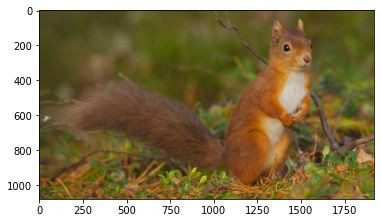

In [36]:
import cv2
import numpy as np
ss = cv2.imread("imgs/squirrel.jpg", cv2.IMREAD_COLOR)
print(np.shape(ss)) # 这里因为cv2是使用的numpy数据类型, 因此可以使用 (1080, 1920, 3)

from matplotlib import pyplot as plt # 用来解决不能显示的问题
%matplotlib inline
# 用来解决在jupyter上不能显示的问题
# cv2.imshow("ss",ss)
img2 = cv2.cvtColor(ss,cv2.COLOR_BGR2RGB)  
# 因为读取的图像是GBR, 但是plt显示的是RGB, 因此需要进行翻转, 下面这句与上面一样
# img2 = ss[:,:,::-1] # 必须为 ::-1
plt.imshow(img2)


True

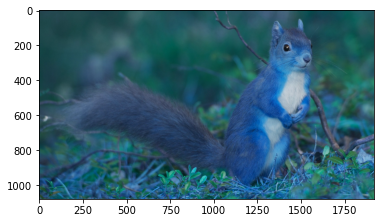

In [15]:
#coding:utf-8
import cv2
img = cv2.imread(r"imgs/squirrel.jpg")
# print(img.shape)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # RGB到灰度
ret,img_threshold = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY) 
# 按照阈值进行图像轮廓提取 https://blog.csdn.net/a19990412/article/details/81172426
# 即将像素点低于200的和高于255的都置零
plt.imshow(img)
# plt.imshow(img_threshold)

# key = cv2.waitKey(0)
# if key==27: #按esc键时，关闭所有窗口
#     print(key)
#     cv2.destroyAllWindows()
cv2.imwrite(r"swap/thre.jpg",img_threshold)

In [19]:
# 针对像素点的处理
img = cv2.imread(r"imgs//刘亦菲.jpg")
#获取和设置
pixel = img[100,100]  #[57 63 68],获取(100,100)处的像素值
img[100,100]=[57,63,99] #设置像素值
b = img[100,100,0]    #57, 获取(100,100)处，blue通道像素值
g = img[100,100,1]    #63 # G 
r = img[100,100,2]      #68 # R
r = img[100,100,2]=99    #设置red通道值

#获取和设置
piexl = img.item(100,100,2) # 读取像素点中的某一个元素
img.itemset((100,100,2),99) # 写入某一个元素
print(piexl)

99


In [ ]:
# 图片性质
import cv2
img = cv2.imread(r"imgs//刘亦菲.jpg")
#rows,cols,channels
img.shape   #返回(280, 450, 3), 宽280(rows)，长450(cols)，3通道(channels)
#size
img.size    #返回378000，所有像素数量，=280*450*3
#type
img.dtype   #dtype('uint8')

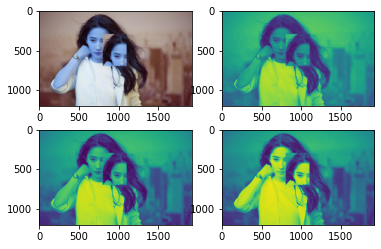

In [31]:
# 截取图像
import cv2

img = cv2.imread(r"imgs//刘亦菲.jpg")
roi = img[100:500,500:800]  #截取100行到200行，列为300到400列的整块区域
img[300:700,800:1100] = roi   #将截取的roi移动到该区域 （50到100行，200到300列）
plt.subplot(2,2,1)
plt.imshow(img)
b = img[:,:,0]  #截取整个蓝色通道
plt.subplot(2,2,2)
plt.imshow(b)
b,g,r = cv2.split(img) #截取三个通道，比较耗时
plt.subplot(2,2,3)
plt.imshow(g)
plt.subplot(2,2,4)
plt.imshow(r)
img = cv2.merge((b,g,r))

# 添加边缘
cv2.copyMakeBorder()
- img:图像对象
- top,bottom,left,right: 上下左右边界宽度，单位为像素值
- borderType:
```
cv2.BORDER_CONSTANT, 带颜色的边界，需要传入另外一个颜色值
cv2.BORDER_REFLECT, 边缘元素的镜像反射做为边界
cv2.BORDER_REFLECT_101/cv2.BORDER_DEFAULT
cv2.BORDER_REPLICATE, 边缘元素的复制做为边界
CV2.BORDER_WRAP
```
- value: borderType为cv2.BORDER_CONSTANT时，传入的边界颜色值，如[0,255,0]

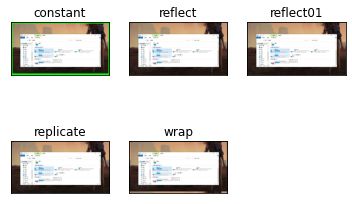

In [40]:
# 添加边界
import cv2 as cv
img2 = cv.imread(r"imgs/01.jpg")
img = cv.cvtColor(img2,cv.COLOR_BGR2RGB)  #matplotlib的图像为RGB格式
constant = cv.copyMakeBorder(img,20,20,20,20,cv.BORDER_CONSTANT,value=[0,255,0]) #绿色
reflect = cv.copyMakeBorder(img,20,20,20,20,cv.BORDER_REFLECT)
reflect01 = cv.copyMakeBorder(img,20,20,20,20,cv.BORDER_REFLECT_101)
replicate = cv.copyMakeBorder(img,20,20,20,20,cv.BORDER_REPLICATE)
wrap = cv.copyMakeBorder(img,20,20,20,20,cv.BORDER_WRAP)
titles = ["constant","reflect","reflect01","replicate","wrap"]
images = [constant,reflect,reflect01,replicate,wrap]

for i in range(5):
    plt.subplot(2,3,i+1),plt.imshow(images[i]),plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# 像素算术运算
cv2.add()
- img1:图片对象1
- img2:图片对象2
- mask:None 掩膜，一般用灰度图做掩膜，img1和img2相加后，和掩膜与运算，从而达到掩盖部分区域的目的）
- dtype:-1

/home/zjq/.conda/envs/scan/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':


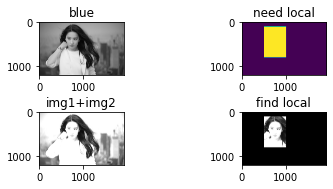

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt # 用来解决不能显示的问题
%matplotlib inline

x,y = 3,2
img1 = cv.imread(r"imgs/03.jpg",0) # 读取蓝色通道
img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
plt.subplot(x,y,1),plt.imshow(img1), plt.title("blue"), plt.tight_layout(2)
roi_img  = np.zeros(img1.shape[0:2],dtype=np.uint8)
roi_img[100:800,500:1000]=255
plt.subplot(x,y,2),plt.imshow(roi_img), plt.title("need local")
img_add = cv.add(img1,img1)
plt.subplot(x,y,3),plt.imshow(img_add), plt.title("img1+img2")
img_add_mask = cv.add(img1,img1,mask=roi_img)
plt.subplot(x,y,4),plt.imshow(img_add_mask), plt.title("find local")
plt.show()
# # cv.imshow("img1",img1)
# # cv.imshow("roi_img",roi_img)
# cv.imshow("img_add",img_add)
# cv.imshow("img_add_mask",img_add_mask)

# cv.waitKey(0)
# cv.destroyAllWindows()

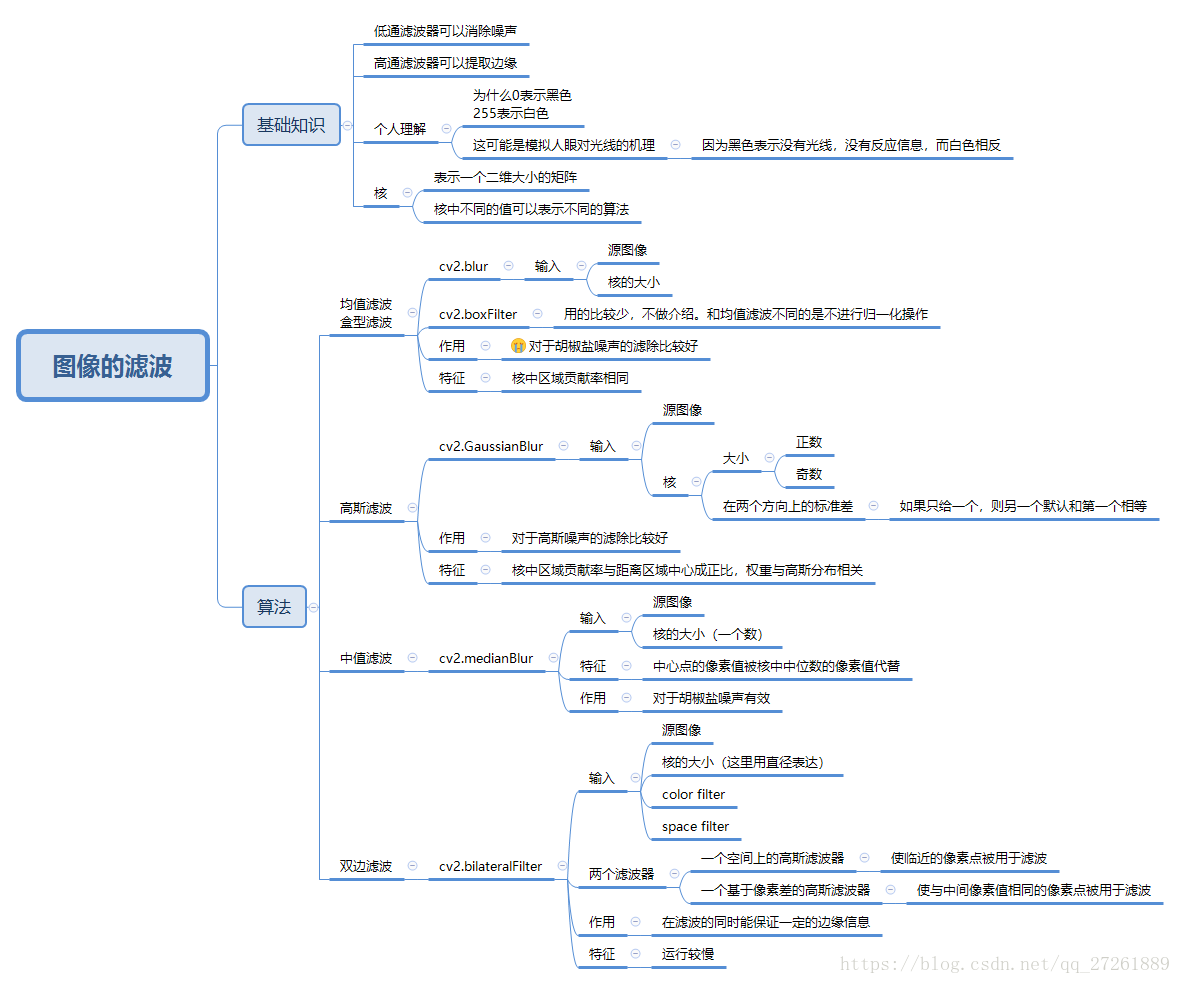

滤波算法主要包括均值滤波，高斯滤波，中值滤波和双边滤波。
每种算法都有自己的特点，建议从原理上了解每种算法的优缺点。上图给出简洁版的总结。

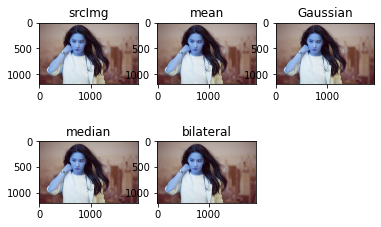

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
########     四个不同的滤波器    #########
img = cv2.imread('imgs/03.jpg')

# 均值滤波
img_mean = cv2.blur(img, (5,5))

# 高斯滤波
img_Guassian = cv2.GaussianBlur(img,(5,5),0)

# 中值滤波
img_median = cv2.medianBlur(img, 5)

# 双边滤波
img_bilater = cv2.bilateralFilter(img,9,75,75)

# 展示不同的图片
titles = ['srcImg','mean', 'Gaussian', 'median', 'bilateral']
imgs = [img, img_mean, img_Guassian, img_median, img_bilater]

for i in range(5):
    plt.subplot(2,3,i+1)#注意，这和matlab中类似，没有0，数组下标从1开始
    plt.imshow(imgs[i])
    plt.title(titles[i])
plt.show()